In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style('darkgrid')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
import nltk
nltk.download("popular")
##feature extraction
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
##classfiers
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.dummy import DummyClassifier


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
##Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix


In [22]:

import string
punctuations = string.punctuation
from nltk.corpus import stopwords
stopword_list = stopwords.words("english")
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
def clean(text):
    cleaned_text = text.lower()
    cleaned_text=re.sub("[^a-zA-Z]"," ",cleaned_text)
    cleaned_text=re.sub(r'\b\w{1,3}\b', '',cleaned_text)

    cleaned_text = "".join(c for c in cleaned_text if c not in punctuations)
    words = cleaned_text.split()
    words = [w for w in words if w not in stopword_list]
     
    words = [lem.lemmatize(word,"v") for word in words]
    words = [lem.lemmatize(word,"n") for word in words]
    words = [lem.lemmatize(word,"r") for word in words]
    cleaned_text = " ".join(words)
    
    return cleaned_text

In [23]:
df=pd.read_csv('/content/drive/My Drive/ML with different/tweetdata.csv')
df.drop(columns =['id', 'Unnamed: 0', 'score'],axis=1, inplace=True)
df.head()

,tweet,label
0,At the point today where if someone says somet...,anger
1,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger
2,This game has pissed me off more than any othe...,anger
3,@spamvicious I've just found out it's Candice ...,anger
4,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger


In [24]:
df['clean_text']=df['tweet'].apply(clean)
df.head()

,tweet,label,clean_text
0,At the point today where if someone says somet...,anger,point today someone say something remotely kin...
1,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,corningfootball game minus relentless
2,This game has pissed me off more than any othe...,anger,game piss game year blood boil time turn stlcards
3,@spamvicious I've just found out it's Candice ...,anger,spamvicious find candice candace pout like
4,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,moocowward mrsajhargreaves melly garybarlow co...


In [ ]:
texts=[]
for i in df['tweet']:
    texts.append(clean(i))

In [26]:
df.drop(['tweet'],axis=1,inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(df['label'])
y

array([0, 0, 0, ..., 3, 3, 3])

In [28]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 
).generate(str(data))
    return wordcloud

In [29]:
categories = df["label"].unique()

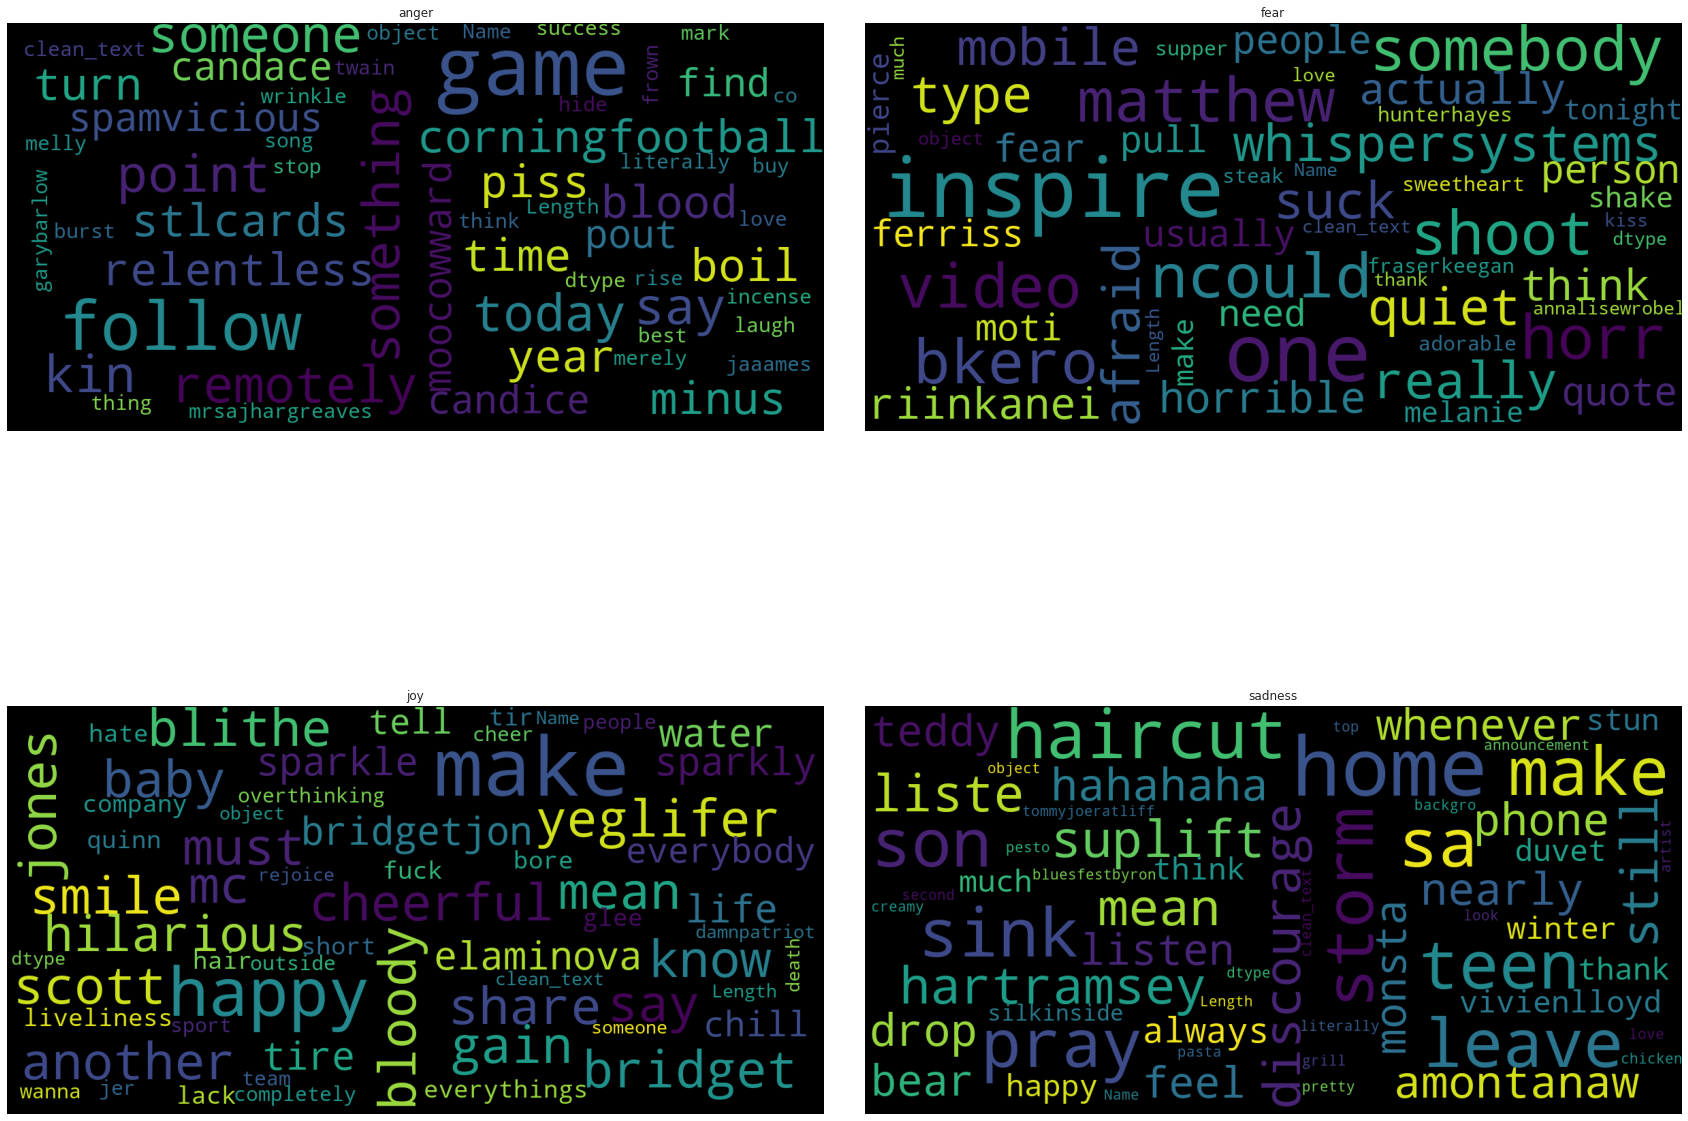

In [30]:
fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(30,25))
plt.axis('off')
for category, ax in zip(categories, axes.flat):
    wordcloud = show_wordcloud(df[df["label"]==category]['clean_text'])
    ax.imshow(wordcloud)
    ax.title.set_text(category)
    ax.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.01)

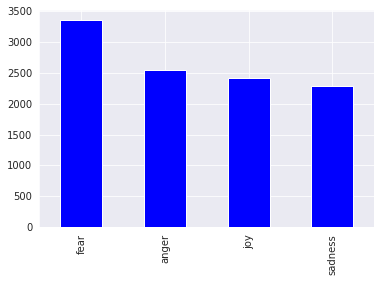

In [31]:
df['label'].value_counts().plot.bar(color = 'blue', figsize = (6, 4))

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

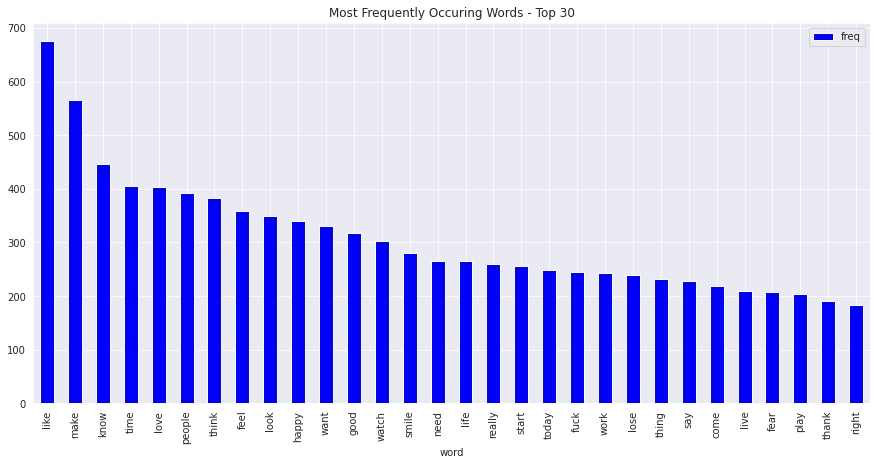

In [32]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.clean_text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


In [33]:
texts = df['clean_text'].astype('str')

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), 
                                   min_df = 2, 
                                   max_df = .95)

x = tfidf_vectorizer.fit_transform(texts) #features
y = df['label'].values #target

print (x.shape)
print(y.shape)

(10591, 32415)
(10591,)


In [34]:
lsa = TruncatedSVD(n_components=100, 
                   n_iter=10, 
                   random_state=3)

x = lsa.fit_transform(x)
x.shape

(10591, 100)

In [35]:
#Creating a dictionary of Models
model_dict = {'Dummy' : DummyClassifier(random_state=3),
              'Stochastic Gradient Descent' : SGDClassifier(random_state=3, loss='log'),
              'Random Forest': RandomForestClassifier(random_state=3),
              'Decsision Tree': DecisionTreeClassifier(random_state=3),
              'AdaBoost': AdaBoostClassifier(random_state=3),
              'Gaussian Naive Bayes': GaussianNB(),
              'K Nearest Neighbor': KNeighborsClassifier()}

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = .3, 
                                                    shuffle = True, 
                                                    stratify = y, 
                                                    random_state = 3)

In [37]:
#function to get the model score into a DataFrame
def model_score_df(model_dict):   
    model_name, ac_score_list, p_score_list, r_score_list, f1_score_list = [], [], [], [], []
    for k,v in model_dict.items():   
        model_name.append(k)
        v.fit(x_train, y_train)
        y_pred = v.predict(x_test)
        ac_score_list.append(accuracy_score(y_test, y_pred))
        p_score_list.append(precision_score(y_test, y_pred, average='macro'))
        r_score_list.append(recall_score(y_test, y_pred, average='macro'))
        f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
        model_comparison_df = pd.DataFrame([model_name, ac_score_list, p_score_list, r_score_list, f1_score_list]).T
        model_comparison_df.columns = ['model_name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score']
        model_comparison_df = model_comparison_df.sort_values(by='f1_score', ascending=False)
    return model_comparison_df

model_score_df(model_dict)

,model_name,accuracy_score,precision_score,recall_score,f1_score
2,Random Forest,0.82,0.83,0.81,0.82
3,Decsision Tree,0.73,0.72,0.72,0.72
6,K Nearest Neighbor,0.67,0.68,0.66,0.67
1,Stochastic Gradient Descent,0.67,0.71,0.65,0.66
4,AdaBoost,0.56,0.56,0.55,0.56
5,Gaussian Naive Bayes,0.51,0.53,0.52,0.51
0,Dummy,0.26,0.26,0.26,0.26


In [41]:
#RF
bootstrap = [True, False]
max_depth = [10, 50, None]
max_features = ['auto', 'sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
n_estimators = [500, 800]
random_state = [3]

clf = RandomForestClassifier()

params = dict(bootstrap = bootstrap,
              max_depth = max_depth,
              max_features = max_features,
              min_samples_leaf = min_samples_leaf,
              n_estimators = n_estimators,
              random_state=random_state)

gridsearch = GridSearchCV(clf,
                          params, 
                          cv=5,
                          verbose=1, 
                          n_jobs=-1)

rf_best_model = gridsearch.fit(x, y)
print(gridsearch.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 125.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 291.1min finished


{'bootstrap': True, 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 500, 'random_state': 3}


In [43]:
rf_best_model = RandomForestClassifier(bootstrap = False,
                                       max_depth = 50,
                                       max_features = 'auto',
                                       min_samples_leaf = 1,
                                       n_estimators = 1400,
                                       random_state=3)

In [52]:
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format


In [54]:
y_b = label_binarize(y, classes = [0, 1, 2, 3])
y_b

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [55]:
n_classes = y_b.shape[1]

In [56]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(x,
                                                            y_b,
                                                            test_size = .3,
                                                            shuffle = True,
                                                            stratify = y,
                                                            random_state = 3)

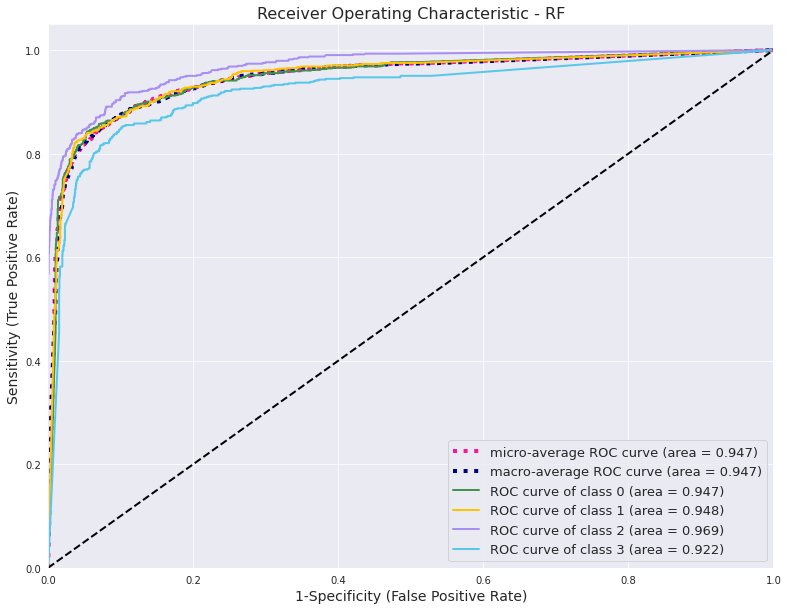

In [57]:
#AUC for Random Forest
rf_classifier = OneVsRestClassifier(rf_best_model)

y_score = rf_classifier.fit(X_train_b, y_train_b).predict_proba(X_test_b)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Compute micro-average ROC curve and ROC area
fpr['micro'], tpr['micro'], _ = roc_curve(y_test_b.ravel(), y_score.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

#First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

#Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

#Finally average it and compute AUC
mean_tpr /= n_classes

fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

#Plot all ROC curves
plt.figure(figsize=(13,10)) 
sns.set_style('darkgrid')
lw=2

plt.plot(fpr['micro'], 
         tpr['micro'], 
         label='micro-average ROC curve (area = {0:0.3f})'''.format(roc_auc['micro']),
         color='deeppink',
         linestyle=':', 
         linewidth=4)

plt.plot(fpr['macro'], 
         tpr['macro'], 
         label='macro-average ROC curve (area = {0:0.3f})'''.format(roc_auc['macro']),
         color='navy', 
         linestyle=':', 
         linewidth=4)

colors = cycle(['#41924F', '#FFC300', '#a98ff3', '#59C7EA'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], 
             color=color, 
             lw=lw, 
             label='ROC curve of class {0} (area = {1:0.3f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)', fontsize = 14)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize = 14)
plt.title('Receiver Operating Characteristic - RF', fontsize = 16)
plt.legend(loc="lower right", fontsize = 13)
plt.show()

In [61]:
#Train test split with stratified sampling.
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = .3, 
                                                    shuffle = True, 
                                                    stratify = y, 
                                                    random_state = 3)

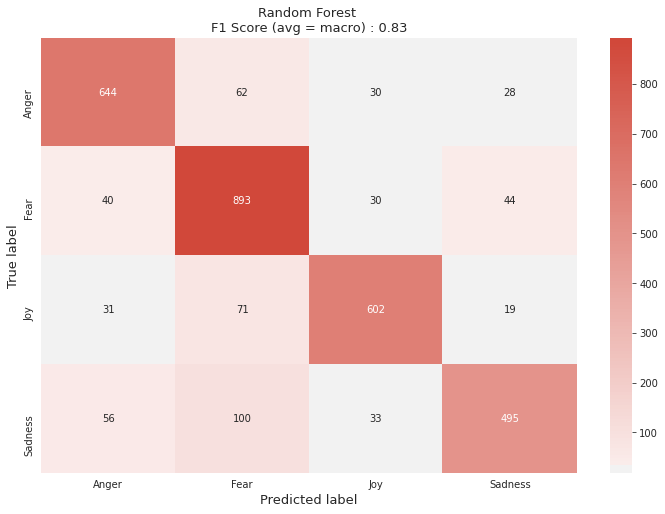

In [62]:
#Confusion Matrix
rf_best_model.fit(X_train, y_train)

#Predict the testing data
y_pred = rf_best_model.predict(X_test)

#Get the confusion matrix and put it into a df
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,
                     index = ['Anger','Fear','Joy', 'Sadness'], 
                     columns = ['Anger','Fear','Joy', 'Sadness'])

#Plot the heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(cm_df, 
            center=0, 
            cmap=sns.diverging_palette(220, 15, as_cmap=True), 
            annot=True, 
            fmt='g')

plt.title('Random Forest \nF1 Score (avg = macro) : {0:.2f}'.format(f1_score(y_test, y_pred, average='macro')), fontsize = 13)
plt.ylabel('True label', fontsize = 13)
plt.xlabel('Predicted label', fontsize = 13)
plt.show()